# Tracking muons with 4 Drift Tubes chambers setup

# Part 1 - Setting up

## Point a - Data fetch and rearrengement

First we need to retrive the data from the VM in cloudVeneto. To do so, we open a tunnel to be able to download the files locally.

`ssh -L 9999:10.67.22.126:22 username@gate.cloudveneto.it`

(we are now in the gate and, if we want, with the command `ssh root@10.67.22.126`, we can access directly to the machine)

To download the data relevant to us we will use, in an another terminal window, the `scp` command as follows

`scp -P 9999 root@localhost:/data/preprocess/data_folder_run/* ~/local_path_where_save`

Once we downloaded all the files we need, we start with our analysis importing all necessary packages and load some global variables.

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
plt.style.use(['ggplot','seaborn-white'])

XCELL = 42.
ZCELL = 13.

# X coordinates translation
global_x_shifts = [994.2, 947.4,-267.4,-261.5,]

# Z coordinates translations
local_z_shifts = [z*ZCELL for z  in range(0,4)]
global_z_shifts = [823.5, 0, 823.5, 0]

The data are formatted in a way that is not suited to form a proper pandas dataframe, so now we have to rearrange them to make easier to do further analysis .

In [ ]:
data_path = 'data/Run000260'
filelist = os.listdir(data_path) #get list of all the file in the folder
filelist.sort() #reorder numerically the list
print (filelist)

#read all the files, row by row, and attach the results in a list
file_merged = []
for i in filelist:
    with open (data_path+'/'+i) as f: #read txt file
        file_merged += f.readlines()

#file_merged

temp = [line [:-1] for line in file_merged] #separate each row

max_column = []
for i in temp:
    max_column.append(int(i.split(" ")[1])) #separetes value of each row and take the 2nd value (number of hits)

value_max_columns = 5*np.amax(max_column)+2 #max number of columns 
#print (value_max_columns) #number of tot column are 5*number hits +2 (index and number of hits)

['data_000000.txt']


In [ ]:
listoflist=[]
for i in range(len(temp)):    
    length3 = []
    for j in temp[i].split(" "): #separate each value of one row
        length3.append(float(j)) #transform the value from str to float and append to a list
    
    #length3 = np.append(length3, np.zeros(value_max_columns-len(length3)) + np.nan) #fill nan (automatically done?)
    listoflist.append (length3) #append the previous list to the first one

run_000260 = pd.DataFrame(listoflist)
run_000260

,0,1,2,3,4,5,6,7,8,9,...,382,383,384,385,386,387,388,389,390,391
0,1.0,6.0,0.0,4.0,165.60,170.40,44.0,0.0,1.0,101.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,7.0,2.0,3.0,355.10,358.90,35.0,2.0,1.0,355.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,12.0,0.0,1.0,650.30,651.70,14.0,2.0,2.0,165.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,11.0,2.0,2.0,77.06,90.94,129.0,2.0,3.0,49.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8177,8446.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8178,8447.0,8.0,2.0,2.0,163.10,172.90,90.0,2.0,2.0,206.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8179,8448.0,8.0,2.0,1.0,311.90,318.10,58.0,2.0,3.0,313.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8180,8449.0,2.0,1.0,4.0,544.40,547.60,30.0,1.0,3.0,505.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here we rename the columns as described in the project instructions.

In [ ]:
#columns name
col_names = ['event_number', 'number_hits']

for i in range (1, np.amax(max_column)+1):
    col_names += [f'hit_{i}_chamber'] + [f'hit_{i}_layer'] + [f'hit_{i}_xleft'] + [f'hit_{i}_xright'] + [f'hit_{i}_time']

run_000260.columns = col_names #set columns names

#drop times column (don't need them?)
run_000260.drop(run_000260.filter(regex='_time').columns, axis=1, inplace=True)
run_000260

,event_number,number_hits,hit_1_chamber,hit_1_layer,hit_1_xleft,hit_1_xright,hit_2_chamber,hit_2_layer,hit_2_xleft,hit_2_xright,...,hit_76_xleft,hit_76_xright,hit_77_chamber,hit_77_layer,hit_77_xleft,hit_77_xright,hit_78_chamber,hit_78_layer,hit_78_xleft,hit_78_xright
0,1.0,6.0,0.0,4.0,165.60,170.40,0.0,1.0,101.50,108.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,7.0,2.0,3.0,355.10,358.90,2.0,1.0,355.40,358.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,12.0,0.0,1.0,650.30,651.70,2.0,2.0,165.90,170.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,11.0,2.0,2.0,77.06,90.94,2.0,3.0,49.78,76.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8177,8446.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8178,8447.0,8.0,2.0,2.0,163.10,172.90,2.0,2.0,206.20,213.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8179,8448.0,8.0,2.0,1.0,311.90,318.10,2.0,3.0,313.00,317.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8180,8449.0,2.0,1.0,4.0,544.40,547.60,1.0,3.0,505.60,544.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we save the current dataframe (with the local coordinates) into a `.csv` file for later use.

In [ ]:
run_000260.to_csv('run_000260_local.csv') #save the current dataframe into a .csv file
run_000260_global = run_000260.copy() #copy the dataframe into another variable

Now we want to transform the local coordinate into global one: we could use a couple of `for` cycle in combination with `if` statements to change, one by one, the values of the dataframe (as shown below), but a (much) faster method involve using masks with pandas to set the values based on some conditions.

In [ ]:
#FASTER METHOD BELOW
#non_zero_hits = run_000260_global[run_000260_global.number_hits != 0].index.to_list() #index with number of hits != 0

#changing to x-z global coordinates
#for i in range (1,np.amax(max_column)+1):
    
    #for j in non_zero_hits: #iterate only on non-zero hits entries
    
        #if run_000260_global[f'hit_{i}_chamber'][j] == 0.0:
        #    run_000260_global[f'hit_{i}_xleft'][j] -= global_x_shifts[0]
        #    run_000260_global[f'hit_{i}_xright'][j] -= global_x_shifts[0]
        #    run_000260_global[f'hit_{i}_layer'][j] = global_z_shifts[0] #z coord

        #if run_000260_global[f'hit_{i}_chamber'][j] == 1.0:
        #    run_000260_global[f'hit_{i}_xleft'][j] -= global_x_shifts[1]
        #    run_000260_global[f'hit_{i}_xright'][j] -= global_x_shifts[1]
        #    run_000260_global[f'hit_{i}_layer'][j] = global_z_shifts[1] #z coord
            
        #if run_000260_global[f'hit_{i}_chamber'][j] == 2.0:
        #    run_000260_global[f'hit_{i}_xleft'][j] -= global_x_shifts[2]
        #    run_000260_global[f'hit_{i}_xright'][j] -= global_x_shifts[2]
        #    run_000260_global[f'hit_{i}_layer'][j] = global_z_shifts[2] #z coord

        #if run_000260_global[f'hit_{i}_chamber'][j] == 3.0:
        #    run_000260_global[f'hit_{i}_xleft'][j] -= global_x_shifts[3]
        #    run_000260_global[f'hit_{i}_xright'][j] -= global_x_shifts[3]
        #    run_000260_global[f'hit_{i}_layer'][j] = global_z_shifts[3] #z coord

        #if run_000260[f'hit_{i}_layer'][j] == 1.0:
        #    run_000260_global[f'hit_{i}_layer'][j] += local_z_shifts[0] #add 0 so it's not usefull
        #if run_000260[f'hit_{i}_layer'][j] == 2.0:
        #    run_000260_global[f'hit_{i}_layer'][j] += local_z_shifts[1] 
        #if run_000260[f'hit_{i}_layer'][j] == 3.0:
        #    run_000260_global[f'hit_{i}_layer'][j] += local_z_shifts[2]
        #if run_000260[f'hit_{i}_layer'][j] == 4.0:
        #    run_000260_global[f'hit_{i}_layer'][j] += local_z_shifts[3]

In [ ]:
for number in range (4):
    for i in range (1,np.amax(max_column)+1): #from local x to global x
        run_000260_global.loc[run_000260_global[f'hit_{i}_chamber'] == number, f'hit_{i}_xleft'] -= global_x_shifts[number] #minus due to rotation (180°) of detectors
        run_000260_global.loc[run_000260_global[f'hit_{i}_chamber'] == number, f'hit_{i}_xright'] -= global_x_shifts[number]

    #for i in range (1,np.amax(max_column)+1): #set local z to global z (no layer)
        run_000260_global.loc[run_000260_global[f'hit_{i}_chamber'] == number, f'hit_{i}_layer'] = global_z_shifts[number]

for i in range (1,np.amax(max_column)+1): #set global z based on layer
    run_000260_global.loc[run_000260[f'hit_{i}_layer'] == 1.0, f'hit_{i}_layer'] += local_z_shifts[3] #remember the rotation of 180
    run_000260_global.loc[run_000260[f'hit_{i}_layer'] == 2.0, f'hit_{i}_layer'] += local_z_shifts[2]
    run_000260_global.loc[run_000260[f'hit_{i}_layer'] == 3.0, f'hit_{i}_layer'] += local_z_shifts[1]
    run_000260_global.loc[run_000260[f'hit_{i}_layer'] == 4.0, f'hit_{i}_layer'] += local_z_shifts[0]

In [ ]:
col_names_redux = [ x for x in col_names [2:] if "_chamber" not in x and "_layer" not in x and "_time" not in x]

for i in col_names_redux: #compensate the rotation of the detectors by multiply the x-coord by -1
    run_000260_global[i] = run_000260_global[i].multiply(-1)

col_names = ['event_number', 'number_hits']
#invert left with right
for i in range (1, np.amax(max_column)+1):
    col_names += [f'hit_{i}_chamber'] + [f'hit_{i}_layer'] + [f'hit_{i}_xright'] + [f'hit_{i}_xleft']# + [f'hit_{i}_time']

run_000260_global.columns = col_names

In [ ]:
run_000260_global

,event_number,number_hits,hit_1_chamber,hit_1_layer,hit_1_xright,hit_1_xleft,hit_2_chamber,hit_2_layer,hit_2_xright,hit_2_xleft,...,hit_76_xright,hit_76_xleft,hit_77_chamber,hit_77_layer,hit_77_xright,hit_77_xleft,hit_78_chamber,hit_78_layer,hit_78_xright,hit_78_xleft
0,1.0,6.0,0.0,823.5,828.60,823.80,0.0,862.5,892.70,885.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,7.0,2.0,836.5,-622.50,-626.30,2.0,862.5,-622.80,-626.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,12.0,0.0,862.5,343.90,342.50,2.0,849.5,-433.30,-437.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,11.0,2.0,849.5,-344.46,-358.34,2.0,836.5,-317.18,-343.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8177,8446.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8178,8447.0,8.0,2.0,849.5,-430.50,-440.30,2.0,849.5,-473.60,-481.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8179,8448.0,8.0,2.0,862.5,-579.30,-585.50,2.0,836.5,-580.40,-584.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8180,8449.0,2.0,1.0,0.0,403.00,399.80,1.0,13.0,441.80,403.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finally, we save the dataframe into a `.csv`, to avoid doing all the operations above every time.

In [ ]:
run_000260_global.to_csv('run_000260_global.csv')

To confront the output of the two methods and verify that they are the same, we could use the code below: it opens the 2 .csv files and confront line by line and, if it finds some difference, it writes them in a new .csv file.

In [ ]:
#code to confront 2 csv and save the differences into another .csv file
#with open('run_000260_global.csv', 'r') as t1, open('run_000260_global_TEST.csv', 'r') as t2:
#    fileone = t1.readlines()
#    filetwo = t2.readlines()

#with open('update.csv', 'w') as outFile:
#    for line in filetwo:
#        if line not in fileone:
#            outFile.write(line)

We want to generalize the procedure described step-by-step above, in order to do perform these operations on all the runs. So we inglobe all the code into a funcion that take as input the data path of the data to rearrenge.

In [ ]:
#function that inglobe all the above

def rearrengement (data_path, drop_time):    
    filelist = os.listdir(data_path)
    filelist.sort()

    file_merged = []
    for i in filelist:
        with open (data_path+'/'+i) as f: #read txt file
            file_merged += f.readlines()

    temp = [line [:-1] for line in file_merged] #separate each row

    max_column = []
    for i in temp:
        max_column.append(int(i.split(" ")[1])) #separetes value of the rows

    listoflist=[]
    for i in range(len(temp)):    
        length3 = []
        for j in temp[i].split(" "):
            length3.append(float(j)) #from str to float
        listoflist.append (length3)

    col_names = ['event_number', 'number_hits']
    for i in range (1, np.amax(max_column)+1):
        col_names += [f'hit_{i}_chamber'] + [f'hit_{i}_layer'] + [f'hit_{i}_xleft'] + [f'hit_{i}_xright'] + [f'hit_{i}_time']

    run_000260 = pd.DataFrame(listoflist, columns=col_names)

    if drop_time == True: #if True, drop the time columns
        run_000260.drop(run_000260.filter(regex='_time').columns, axis=1, inplace=True)

    run_000260.to_csv('run_'+data_path [8:]+'_local.csv', index=False)

    run_000260_global = run_000260.copy()

    for number in range (4):
        for i in range (1,np.amax(max_column)+1):
            run_000260_global.loc[run_000260_global[f'hit_{i}_chamber'] == number, f'hit_{i}_xleft'] -= global_x_shifts[number]
            run_000260_global.loc[run_000260_global[f'hit_{i}_chamber'] == number, f'hit_{i}_xright'] -= global_x_shifts[number]

            run_000260_global.loc[run_000260_global[f'hit_{i}_chamber'] == number, f'hit_{i}_layer'] = global_z_shifts[number]

    for i in range (1,np.amax(max_column)+1):
        run_000260_global.loc[run_000260[f'hit_{i}_layer'] == 1.0, f'hit_{i}_layer'] += local_z_shifts[3]
        run_000260_global.loc[run_000260[f'hit_{i}_layer'] == 2.0, f'hit_{i}_layer'] += local_z_shifts[2]
        run_000260_global.loc[run_000260[f'hit_{i}_layer'] == 3.0, f'hit_{i}_layer'] += local_z_shifts[1]
        run_000260_global.loc[run_000260[f'hit_{i}_layer'] == 4.0, f'hit_{i}_layer'] += local_z_shifts[0]

    col_names_redux = [ x for x in col_names [2:] if "_chamber" not in x and "_layer" not in x and "_time" not in x]

    for i in col_names_redux: #compensate the rotation of the detectors by multiply the x-coord by -1
        run_000260_global[i] = run_000260_global[i].multiply(-1)

    col_names = ['event_number', 'number_hits']

    if drop_time == False:
        for i in range (1, np.amax(max_column)+1):
            col_names += [f'hit_{i}_chamber'] + [f'hit_{i}_layer'] + [f'hit_{i}_xright'] + [f'hit_{i}_xleft'] + [f'hit_{i}_time']
    else:
        for i in range (1, np.amax(max_column)+1):
            col_names += [f'hit_{i}_chamber'] + [f'hit_{i}_layer'] + [f'hit_{i}_xright'] + [f'hit_{i}_xleft']

    run_000260_global.columns = col_names

    run_000260_global.to_csv('run_'+data_path [8:]+'_global.csv', index=False)

In [ ]:
#calibration run
rearrengement ('data/Run000260', True)
rearrengement ('data/Run000261', True)
rearrengement ('data/Run000262', True)
rearrengement ('data/Run000263', True)

In [ ]:
#physical run
rearrengement ('data/Run000331', True)
rearrengement ('data/Run000332', True)

For every run, we saved two version of the dataset: one with the local coordinates (`run_000xxx_local.csv`) and one with the global ones (`run_000xxx_global.csv`).

<br />

# Point b - Data visualisation

Now we display event-by-event the four detectors, with the hits and the correspondindg cells. The following function allow us to do that, in particular we just have to indicate the file of the run to analyse and a particular event.

In [ ]:
def event_visualization (file_name, event_number):
    run_000260_global = pd.read_csv(file_name+'.csv')f

    event_list = run_000260_global.event_number.to_list()
    check_list = event_number not in event_list #the event number inserted exist in the dataframe?

    if check_list == True or event_number < 0: #if not, print error
        print ('Event number not present, try another one...')
    else:    
        event_1 = run_000260_global.loc[run_000260_global['event_number'] == event_number].iloc[0].dropna() #select the correct event

        if event_1.number_hits == 0.0: #if the event has no hits, print ...
            print (f'No hits detected for event {int(event_1.event_number)}')
            
        else:

            layer, xleft, xright = [], [], []
            for i in range (1, int(event_1.number_hits +1)):
                layer.append (event_1 [f'hit_{i}_layer'])
                xleft.append (event_1 [f'hit_{i}_xleft'])
                xright.append (event_1 [f'hit_{i}_xright'])

            fig, ax = plt.subplots(figsize=(8,6))

            ax.scatter (xleft,layer, color='r', label= 'left', s=5)
            ax.scatter (xright,layer, color='b', label= 'right', s=5)
            ax.set_xlim(-1000,1000)
            ax.set_ylim(-50,1000)
            ax.legend()

            #value 700 choose randomly
            ax.add_patch(Rectangle((global_x_shifts[3] - 700, global_z_shifts[0]-ZCELL/2), 700, 4*ZCELL, fill=None,color='gray')) #0
            ax.add_patch(Rectangle((global_x_shifts[2] - 700, -ZCELL/2), 700, 4*ZCELL, fill=None,color='gray')) #1
            ax.add_patch(Rectangle((global_x_shifts[1]- 700, global_z_shifts[0]-ZCELL/2), 700, 4*ZCELL, fill=None,color='gray')) #2
            ax.add_patch(Rectangle((global_x_shifts[0]- 700, -ZCELL/2), 700, 4*ZCELL, fill=None,color='gray')) #3

            plt.xlabel('x [mm]')
            plt.ylabel('z [mm]')
            plt.title(f'Event {int(event_1.event_number)}')

            plt.show()

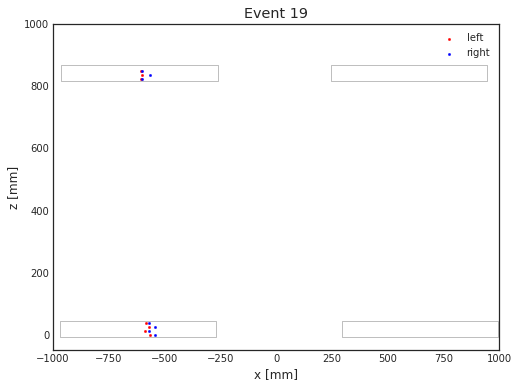

In [ ]:
event_visualization ('run_000261_global', 19)

In [ ]:
#some debug checks
event_visualization ('run_000261_global', 21)

event_visualization ('run_000261_global', 4300)
event_visualization ('run_000261_global', -1)

No hits detected for event 21


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2ab1dc03-9ec6-464c-8ad6-0ce9b1b292a9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>